In [1]:
import numpy as np
import xarray as xr
import holoviews as hv
hv.notebook_extension()

## Open dataset in holoviews and plot it

In [11]:
ds = xr.open_dataset("../data/2017-11-03 mag sequence phase.nc")
hvds = hv.Dataset(ds)
hvds

:Dataset   [y,x,field]   (Absolute value,Phase)

:HoloMap   [field]
   :Image   [x,y]   (Absolute value)
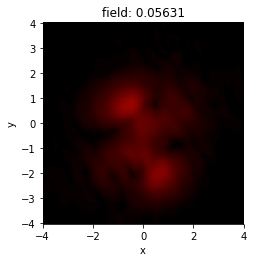
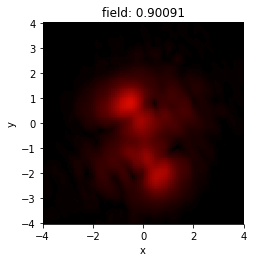
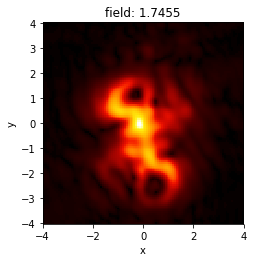
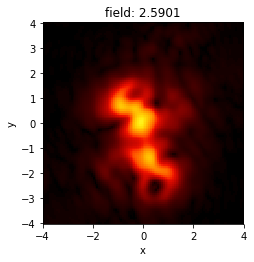
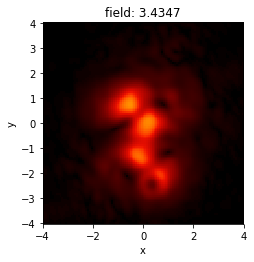
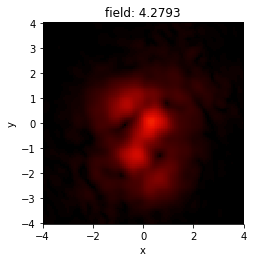
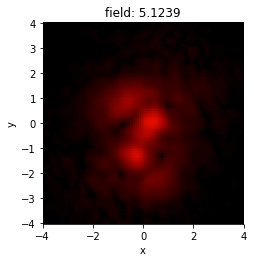
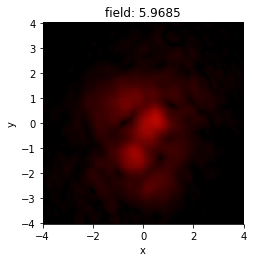
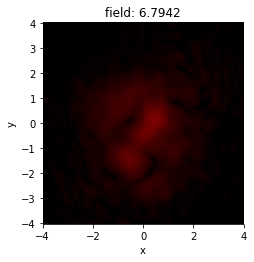
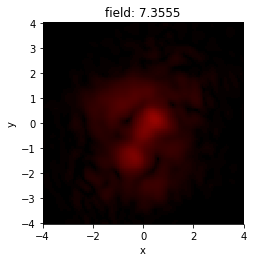
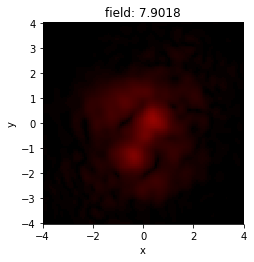
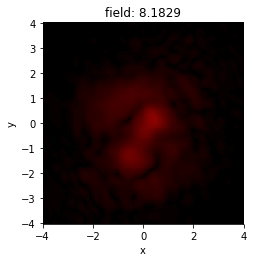

In [14]:
absolute_values = hvds.to(hv.Image, kdims=["x", "y"], vdims=["Absolute value"])
absolute_values

:HoloMap   [field]
   :Image   [x,y]   (Phase)
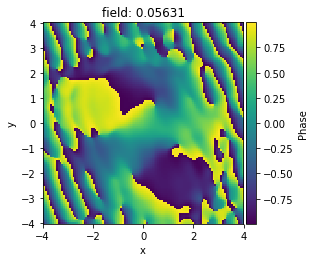
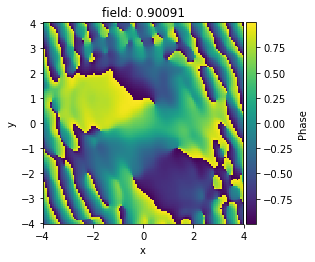
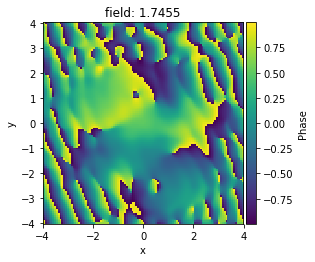
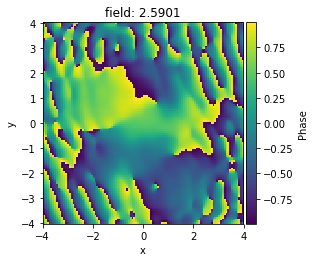
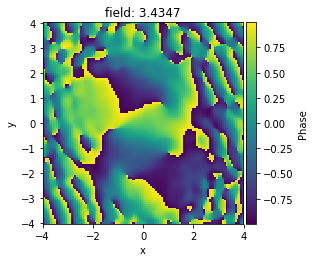
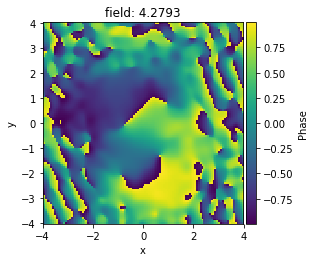
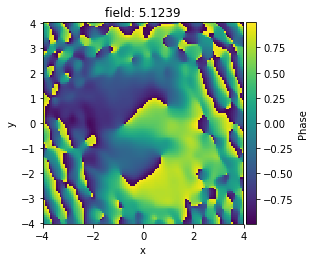
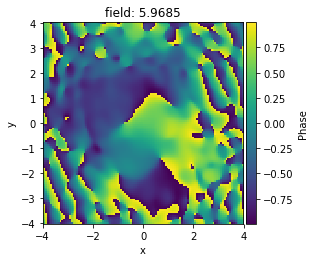
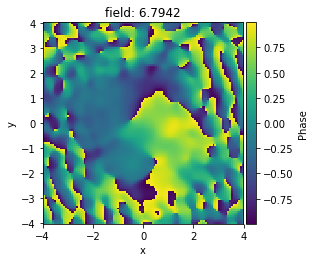
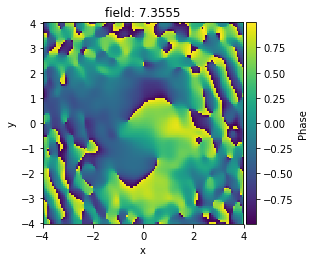
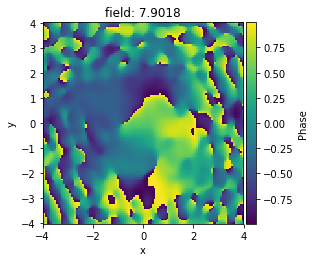
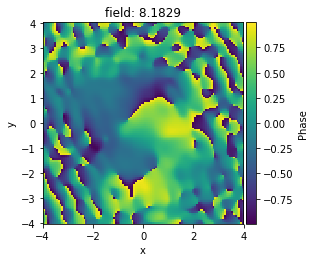

In [15]:
%%opts Image [colorbar=True] (cmap="viridis")
phases = hvds.to(hv.Image, kdims=["x", "y"], vdims=["Phase"])
phases

## To select one image and make it larger:
you can also play with "dpi" instead of "size"

:Image   [x,y]   (Phase)
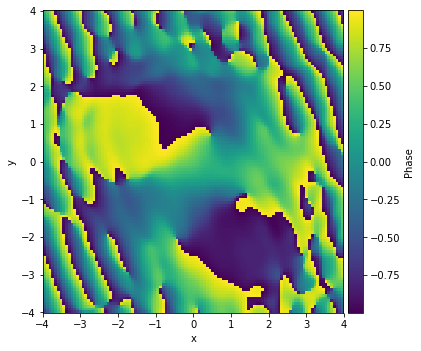

In [38]:
%%output size=150
phases[0.05631]

## If you want to see everything at the same time

:NdLayout   [field]
   :Image   [x,y]   (Phase)
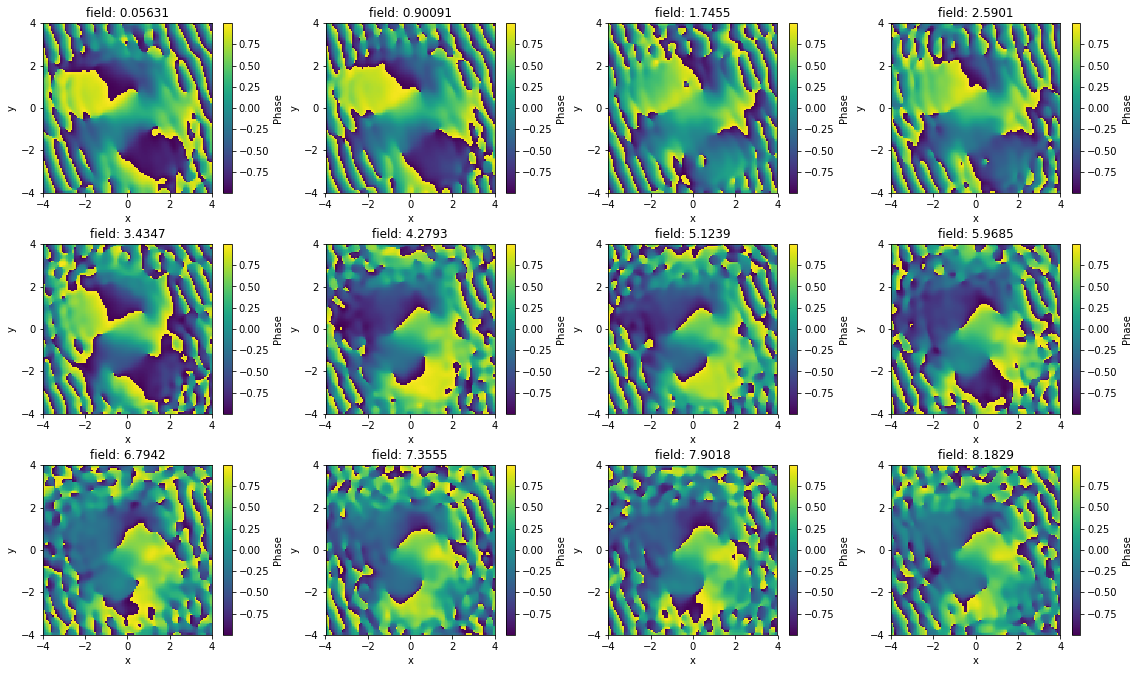

In [36]:
phases.layout()

## Get the raw data:
Also see http://holoviews.org/user_guide/Transforming_Elements.html

In [16]:
xs = phases.dimension_values("x", expanded=False)
ys = phases.dimension_values("y", expanded=False)
ys

array([-3.97749618e+00, -3.90517806e+00, -3.83285995e+00, -3.76054184e+00,
       -3.68822373e+00, -3.61590562e+00, -3.54358750e+00, -3.47126939e+00,
       -3.39895128e+00, -3.32663317e+00, -3.25431505e+00, -3.18199694e+00,
       -3.10967883e+00, -3.03736072e+00, -2.96504260e+00, -2.89272449e+00,
       -2.82040638e+00, -2.74808827e+00, -2.67577016e+00, -2.60345204e+00,
       -2.53113393e+00, -2.45881582e+00, -2.38649771e+00, -2.31417959e+00,
       -2.24186148e+00, -2.16954337e+00, -2.09722526e+00, -2.02490714e+00,
       -1.95258903e+00, -1.88027092e+00, -1.80795281e+00, -1.73563470e+00,
       -1.66331658e+00, -1.59099847e+00, -1.51868036e+00, -1.44636225e+00,
       -1.37404413e+00, -1.30172602e+00, -1.22940791e+00, -1.15708980e+00,
       -1.08477168e+00, -1.01245357e+00, -9.40135460e-01, -8.67817348e-01,
       -7.95499235e-01, -7.23181123e-01, -6.50863011e-01, -5.78544898e-01,
       -5.06226786e-01, -4.33908674e-01, -3.61590562e-01, -2.89272449e-01,
       -2.16954337e-01, -

In [19]:
fields = phases.dimension_values("field", expanded=False)

# setting flat=False will preserve the matrix shape
data = phases[fields[0]].dimension_values("Phase", flat=False)
data

array([[-0.6412766 , -0.43532921, -0.20929781, ..., -0.93852358,
        -0.68545365, -0.41634682],
       [-0.52681299, -0.29525264, -0.08022318, ..., -0.86455613,
        -0.61750351, -0.36762533],
       [-0.41112766, -0.18281519,  0.01019814, ..., -0.76447293,
        -0.54205878, -0.32290368],
       ...,
       [ 0.15441037,  0.35288232,  0.57086754, ...,  0.73689267,
         0.99556844, -0.78386289],
       [ 0.23712779,  0.42096573,  0.62663922, ...,  0.81086218,
        -0.93655982, -0.7316351 ],
       [ 0.29492095,  0.46977685,  0.66802377, ...,  0.88854545,
        -0.86709348, -0.67275425]])

## How to make a new Image

:Image   [x,y]   (Phase)
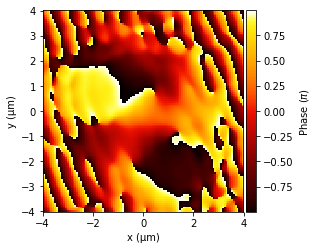

In [34]:
%%opts Image [colorbar=True]
new_image = hv.Dataset((xs, ys, data), [hv.Dimension("x", unit="µm"),
                                        hv.Dimension("y", unit="µm")],
                       hv.Dimension("Phase", unit="$\pi$")).to(hv.Image)
new_image

## How to make Curve and Scatter plots

:Curve   [x]   (y)
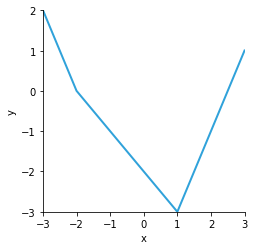

In [30]:
curve = hv.Curve(([-3, -2, 1, 3], [2, 0, -3, 1]))
curve

:Scatter   [x]   (y)
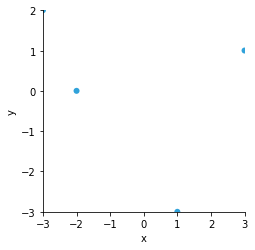

In [28]:
scatter = hv.Scatter(([-3, -2, 1, 3], [2, 0, -3, 1]))
scatter

## How to combine plots

:Layout
   .Image.I :Image   [x,y]   (Phase)
   .Curve.I :Curve   [x]   (y)
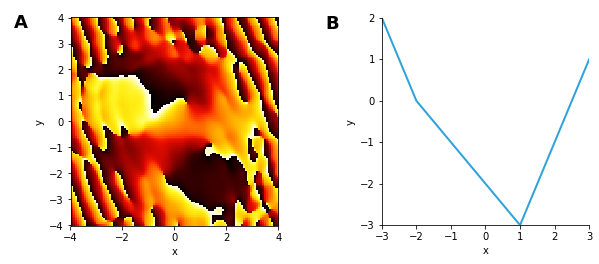

In [31]:
new_image + curve

:Overlay
   .Image.I   :Image   [x,y]   (Phase)
   .Scatter.I :Scatter   [x]   (y)
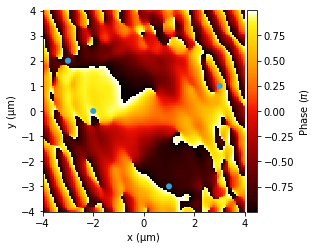

In [35]:
new_image * scatter